Since we are using Albumentations library to apply data agumentation, we present this notebook to display what type of operations does our transformer apply during traning or testing.

To know more about Albumentations lib visit https://albumentations.ai/

In [ ]:
!pip install -U albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 19.7 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision import transforms
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
image = cv2.imread("/content/img.png")

In [ ]:
image.shape

(387, 534, 3)

In [ ]:
IMAGE_SIZE=416
scale=1.1

In [ ]:
train_transforms = A.Compose(
    [
     #Rescale an image so that maximum side is equal to max_size, keeping the aspect ratio of the initial image.
     A.LongestMaxSize(max_size=int(IMAGE_SIZE * scale)),
     #adding pad if the if side is less than desired number
     A.PadIfNeeded(
         min_height=int(IMAGE_SIZE * scale),
         min_width=int(IMAGE_SIZE * scale),
         border_mode=cv2.BORDER_CONSTANT,
         ),
     #Crop a random part of the input.
     A.RandomCrop(width=IMAGE_SIZE, height=IMAGE_SIZE),
     #Randomly changes the brightness, contrast, and saturation of an image
     A.ColorJitter(brightness=0.6, contrast=0.6, saturation=0.6, hue=0.6, p=0.4),
     A.OneOf(
         [
          #randomly translate, scale and rotate the input.
          A.ShiftScaleRotate(rotate_limit=10, p=0.4, border_mode=cv2.BORDER_CONSTANT),
          #Place a regular grid of points on the input and randomly move the neighbourhood of these point around
          A.IAAAffine(shear=10, p=0.4, mode="constant"),
          ],p=1.0,),
     A.HorizontalFlip(p=0.5),
     A.Blur(p=0.1),
     #Apply Contrast Limited Adaptive Histogram Equalization to the input image
     A.CLAHE(p=0.1),
     #Reduce the number of bits for each color channel.
     A.Posterize(p=0.1),
     A.ToGray(p=0.1),
     #Randomly rearrange channels of the input RGB image.
     A.ChannelShuffle(p=0.05),
     A.Normalize(mean=[0, 0, 0], std=[1, 1, 1], max_pixel_value=255,),
     ToTensorV2(),],
     #bbox_params=A.BboxParams(format="yolo", min_visibility=0.4, label_fields=[],),
)
test_transforms = A.Compose(
    [
        A.LongestMaxSize(max_size=IMAGE_SIZE),
        A.PadIfNeeded(
            min_height=IMAGE_SIZE, min_width=IMAGE_SIZE, border_mode=cv2.BORDER_CONSTANT
        ),
        A.Normalize(mean=[0, 0, 0], std=[1, 1, 1], max_pixel_value=255,),
        ToTensorV2(),
    ],
    #bbox_params=A.BboxParams(format="yolo", min_visibility=0.4, label_fields=[]),
)


/usr/local/lib/python3.8/dist-packages/albumentations/imgaug/transforms.py:348: FutureWarning: This IAAAffine is deprecated. Please use Affine instead
  @property


In [ ]:
transfored_train= train_transforms(image=image)

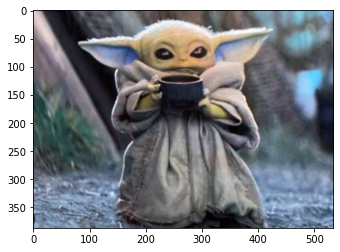

In [ ]:
plt.imshow(image)

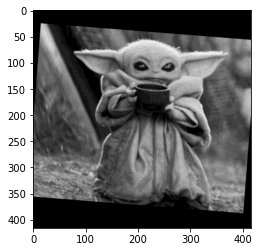

In [ ]:
plt.imshow(transfored_train['image'].permute(1,2,0))

In [ ]:
transfored_test= test_transforms(image=image)

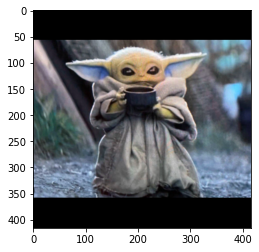

In [ ]:
plt.imshow(transfored_test['image'].permute(1,2,0))